In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
calls_df = pd.read_csv(r'dataset\calls.csv')
customers_df = pd.read_csv(r'dataset\customers.csv')
reasons_df = pd.read_csv(r'dataset\reasons.csv')
sentiment_statistics_df = pd.read_csv(r'dataset\sentiment_statistics.csv')
test_df = pd.read_csv(r'dataset\test.csv')

merged_df = calls_df.merge(customers_df, on='customer_id')
merged_df = merged_df.merge(reasons_df, on='call_id')
merged_df = merged_df.merge(sentiment_statistics_df, on='call_id')

print(merged_df.head())
print(merged_df.info())

      call_id  customer_id  agent_id_x call_start_datetime  \
0  4667960400   2033123310      963118     7/31/2024 23:56   
1  1122072124   8186702651      519057       8/1/2024 0:03   
2  6834291559   2416856629      158319     7/31/2024 23:59   
3  2266439882   1154544516      488324       8/1/2024 0:05   
4  1211603231   5214456437      721730       8/1/2024 0:04   

  agent_assigned_datetime call_end_datetime  \
0           8/1/2024 0:03     8/1/2024 0:34   
1           8/1/2024 0:06     8/1/2024 0:18   
2           8/1/2024 0:07     8/1/2024 0:26   
3           8/1/2024 0:10     8/1/2024 0:17   
4           8/1/2024 0:14     8/1/2024 0:23   

                                     call_transcript      customer_name  \
0  \n\nAgent: Thank you for calling United Airlin...     Matthew Foster   
1  \n\nAgent: Thank you for calling United Airlin...      Tammy Walters   
2  \n\nAgent: Thank you for calling United Airlin...      Jeffery Dixon   
3  \n\nAgent: Thank you for calling United A

In [10]:
merged_df['handle_time'] = pd.to_datetime(merged_df['call_end_datetime']) - pd.to_datetime(merged_df['agent_assigned_datetime'])
merged_df['aht'] = merged_df['handle_time'].dt.total_seconds() / 60
merged_df['wait_time'] = pd.to_datetime(merged_df['agent_assigned_datetime']) - pd.to_datetime(merged_df['call_start_datetime'])
merged_df['ast'] = merged_df['wait_time'].dt.total_seconds() / 60

# Analyze AHT and AST
print(merged_df['aht'].describe())
print(merged_df['ast'].describe())

count    66653.000000
mean        11.619612
std         12.905448
min          0.000000
25%          4.000000
50%          7.000000
75%         15.000000
max        119.000000
Name: aht, dtype: float64
count    66653.000000
mean         7.282868
std          2.519256
min          3.000000
25%          5.000000
50%          7.000000
75%          9.000000
max         15.000000
Name: ast, dtype: float64


In [11]:
merged_df.head()

,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,customer_name,elite_level_code,primary_call_reason,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average,handle_time,aht,wait_time,ast
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...,Matthew Foster,4.0,Voluntary Cancel,963118,neutral,angry,-0.04,0.39,0 days 00:31:00,31.0,0 days 00:07:00,7.0
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...,Tammy Walters,NaN,Booking,519057,calm,neutral,0.02,0.35,0 days 00:12:00,12.0,0 days 00:03:00,3.0
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...,Jeffery Dixon,NaN,IRROPS,158319,neutral,polite,-0.13,0.32,0 days 00:19:00,19.0,0 days 00:08:00,8.0
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...,David Wilkins,2.0,Upgrade,488324,neutral,frustrated,-0.20,0.20,0 days 00:07:00,7.0,0 days 00:05:00,5.0
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...,Elizabeth Daniels,0.0,Seating,721730,neutral,polite,-0.05,0.35,0 days 00:09:00,9.0,0 days 00:10:00,10.0


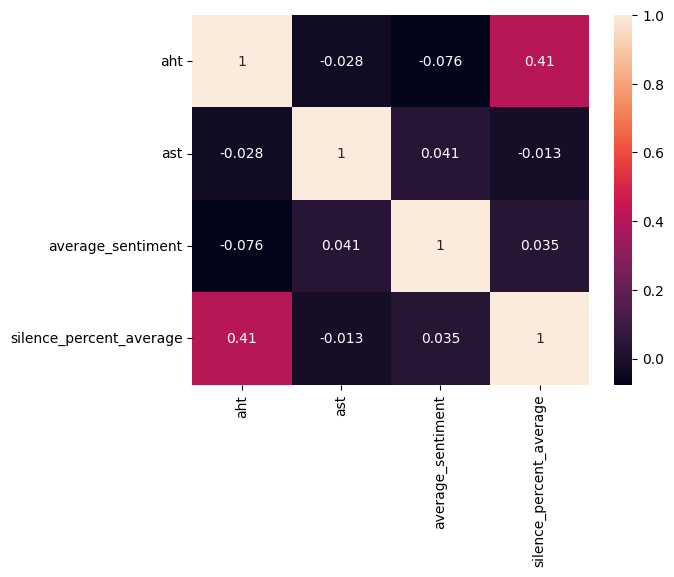

In [12]:
numeric_columns = ['aht', 'ast', 'average_sentiment', 'silence_percent_average']
corr_matrix = merged_df[numeric_columns].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [14]:
# Analyze call reasons
call_reason_counts = merged_df['primary_call_reason'].value_counts()
print(call_reason_counts)

# Identify self-solvable issues
self_solvable_issues = merged_df[merged_df['call_transcript'].str.contains('self-service')]
print("\nSelf Solvable Issues\n")
print(self_solvable_issues['primary_call_reason'].value_counts())

primary_call_reason
IRROPS                     13057
Voluntary Change           10291
Seating                     6223
Mileage Plus                5487
Post-Flight                 3869
Communications              3779
Products and Services       2792
Upgrade                     2682
Baggage                     2616
Booking                     2589
Checkout                    1840
Check-In                    1490
Voluntary Cancel            1304
Digital Support              996
ETC                          930
Traveler Updates             772
Schedule Change              707
Other Topics                 568
Products & Services          476
Disability                   394
Check In                     385
Post Flight                  373
Voluntary  Cancel            278
IRROPS                       254
Other  Topics                234
Voluntary Change             208
Voluntary   Change           200
Voluntary  Change            149
Seating                      142
Digital   Support      

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

calls_df = pd.read_csv(r'dataset\calls.csv')
customers_df = pd.read_csv(r'dataset\customers.csv')
reasons_df = pd.read_csv(r'dataset\reasons.csv')
sentiment_statistics_df = pd.read_csv(r'dataset\sentiment_statistics.csv')
test_df = pd.read_csv(r'dataset\test.csv')

print(calls_df.head())
print(customers_df.head())
print(reasons_df.head())

      call_id  customer_id  agent_id call_start_datetime  \
0  4667960400   2033123310    963118     7/31/2024 23:56   
1  1122072124   8186702651    519057       8/1/2024 0:03   
2  6834291559   2416856629    158319     7/31/2024 23:59   
3  2266439882   1154544516    488324       8/1/2024 0:05   
4  1211603231   5214456437    721730       8/1/2024 0:04   

  agent_assigned_datetime call_end_datetime  \
0           8/1/2024 0:03     8/1/2024 0:34   
1           8/1/2024 0:06     8/1/2024 0:18   
2           8/1/2024 0:07     8/1/2024 0:26   
3           8/1/2024 0:10     8/1/2024 0:17   
4           8/1/2024 0:14     8/1/2024 0:23   

                                     call_transcript  
0  \n\nAgent: Thank you for calling United Airlin...  
1  \n\nAgent: Thank you for calling United Airlin...  
2  \n\nAgent: Thank you for calling United Airlin...  
3  \n\nAgent: Thank you for calling United Airlin...  
4  \n\nAgent: Thank you for calling United Airlin...  
   customer_id      custom

In [27]:
calls_df['handle_time'] = pd.to_datetime(calls_df['call_end_datetime']) - pd.to_datetime(calls_df['agent_assigned_datetime'])
calls_df['handle_time'] = calls_df['handle_time'].dt.total_seconds() / 60  # Convert to minutes

AHT = calls_df['handle_time'].mean()
print("Average Handle Time (AHT):", AHT)


Average Handle Time (AHT): 11.61747667455786


In [28]:
calls_df['queue_time'] = pd.to_datetime(calls_df['agent_assigned_datetime']) - pd.to_datetime(calls_df['call_start_datetime'])
calls_df['queue_time'] = calls_df['queue_time'].dt.total_seconds() / 60  # Convert to minutes

AST = calls_df['queue_time'].mean()
print("Average Speed to Answer (AST):", AST)


Average Speed to Answer (AST): 7.284458988998747


In [30]:
# Merge call reasons with the calls dataframe (assuming 'call_id' is the common key)
calls_reasons_df = pd.merge(calls_df, reasons_df, on='call_id')

# Calculate frequency of call reasons
reason_counts = calls_reasons_df['primary_call_reason'].value_counts()

# Get AHT for the most and least frequent call reasons
most_frequent_reason = reason_counts.idxmax()
least_frequent_reason = reason_counts.idxmin()

AHT_most_frequent = calls_reasons_df[calls_reasons_df['primary_call_reason'] == most_frequent_reason]['handle_time'].mean()
AHT_least_frequent = calls_reasons_df[calls_reasons_df['primary_call_reason'] == least_frequent_reason]['handle_time'].mean()

print(f"AHT for most frequent reason ({most_frequent_reason}): {AHT_most_frequent}")
print(f"AHT for least frequent reason ({least_frequent_reason}): {AHT_least_frequent}")


AHT for most frequent reason (IRROPS): 13.091521789078655
AHT for least frequent reason (Unaccompanied Minor  ): 3.0


In [32]:
sentiment_df = pd.read_csv(r'dataset\sentiment_statistics.csv')

# Merge sentiment with calls data
calls_sentiment_df = pd.merge(calls_df, sentiment_df, on='call_id')

# Analyze sentiment vs. AHT
sentiment_AHT = calls_sentiment_df.groupby('average_sentiment')['handle_time'].mean()

print("AHT by sentiment:")
print(sentiment_AHT)


AHT by sentiment:
average_sentiment
-1.38     1.000000
-1.25     0.000000
-1.22     2.000000
-1.19     1.000000
-1.17     0.000000
           ...    
 0.93     1.000000
 0.96    12.000000
 1.00     0.833333
 1.38     4.000000
 2.67    10.000000
Name: handle_time, Length: 183, dtype: float64


In [13]:
escalated_reasons = calls_reasons_df['primary_call_reason'].value_counts()

print("Most frequent reasons for escalations:")
print(escalated_reasons.head())

Most frequent reasons for escalations:
primary_call_reason
IRROPS              13057
Voluntary Change    10291
Seating              6223
Mileage Plus         5487
Post-Flight          3869
Name: count, dtype: int64


In [33]:
# Identify common reasons that are escalating to agents
escalated_reasons = calls_reasons_df['primary_call_reason'].value_counts()

print("Most frequent reasons for escalations:")
print(escalated_reasons.head())


Most frequent reasons for escalations:
primary_call_reason
IRROPS              13057
Voluntary Change    10291
Seating              6223
Mileage Plus         5487
Post-Flight          3869
Name: count, dtype: int64


C:\Users\prana\AppData\Local\Temp\ipykernel_4036\3741813896.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_sentiment_per_reason = merged_df.groupby('primary_call_reason')['average_sentiment'].mean().reset_index()
C:\Users\prana\AppData\Local\Temp\ipykernel_4036\3741813896.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='primary_call_reason', y='average_sentiment', data=average_sentiment_per_reason, palette='viridis')


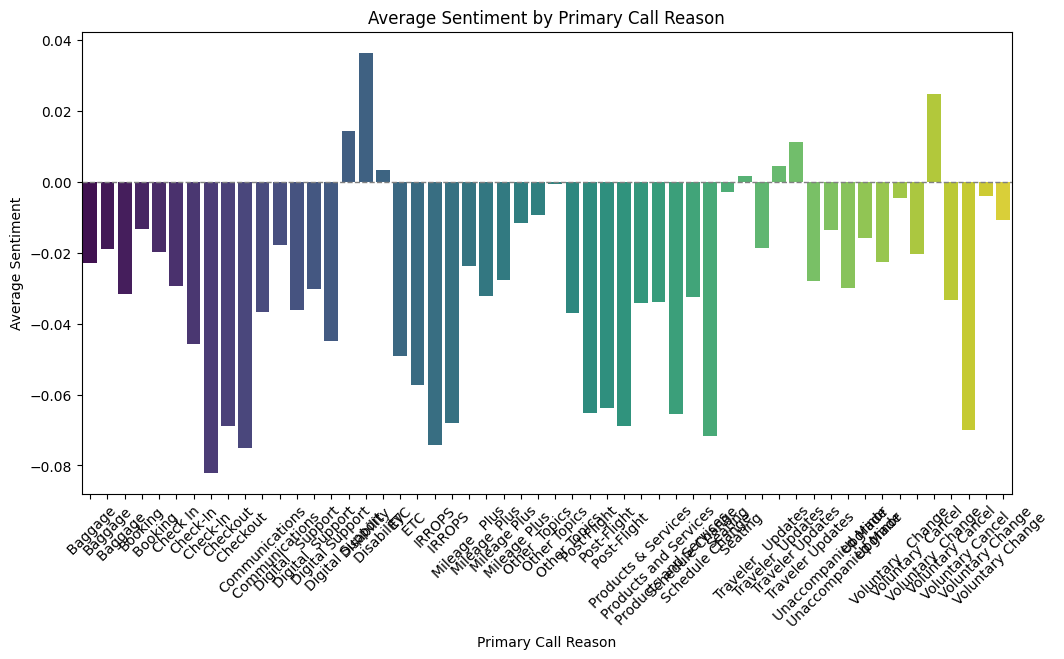

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Ensure 'primary_call_reason' is categorical
merged_df['primary_call_reason'] = merged_df['primary_call_reason'].astype('category')
plt.figure(figsize=(12, 6))
average_sentiment_per_reason = merged_df.groupby('primary_call_reason')['average_sentiment'].mean().reset_index()
sns.barplot(x='primary_call_reason', y='average_sentiment', data=average_sentiment_per_reason, palette='viridis')
plt.title("Average Sentiment by Primary Call Reason")
plt.xlabel("Primary Call Reason")
plt.ylabel("Average Sentiment")
plt.xticks(rotation=45)  
plt.axhline(0, color='grey', lw=1, ls='--')  # Line for neutral sentiment
plt.show()


      Primary Call Reason  Average Sentiment
0                 baggage          -0.019681
1                 booking          -0.013369
2                check in          -0.042993
3                checkout          -0.069030
4          communications          -0.036392
5         digital support          -0.042131
6              disability           0.035757
7                     etc          -0.049327
8                  irrops          -0.074065
9            mileage plus          -0.027398
10           other topics          -0.003848
11            post flight          -0.063914
12    products & services          -0.034055
13  products and services          -0.034493
14        schedule change          -0.033844
15                seating          -0.002770
16       traveler updates           0.006727
17    unaccompanied minor          -0.013846
18                upgrade          -0.016007
19       voluntary cancel          -0.031512
20       voluntary change          -0.003826


C:\Users\prana\AppData\Local\Temp\ipykernel_4036\1121385576.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Primary Call Reason', y='Average Sentiment', data=average_sentiment_per_reason, palette='viridis')


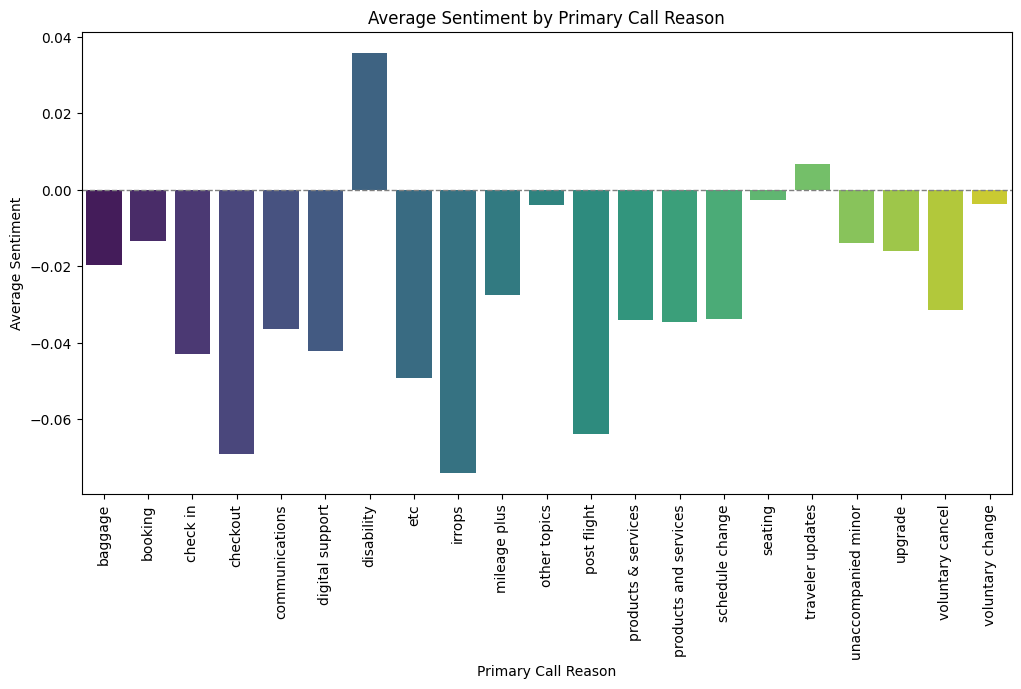

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Clean the primary call reason column
merged_df['primary_call_reason'] = (
    merged_df['primary_call_reason']
    .str.lower()    # Convert to lower case
    .str.strip()    # Remove leading and trailing whitespace
    .str.replace(r'\s+', ' ', regex=True)  # Replace multiple spaces with a single space
    .str.replace('-', ' ', regex=False)  # Replace hyphens with spaces
)

# Step 2: Further standardize specific known variations if needed
merged_df['primary_call_reason'] = merged_df['primary_call_reason'].replace({
    'power flight': 'power flight',
    'power flight ': 'power flight',
    'power-flight': 'power flight',
    # Add more replacements as necessary
}, regex=False)

# Step 3: Aggregate the average sentiment by primary call reason
average_sentiment_per_reason = (
    merged_df.groupby('primary_call_reason')['average_sentiment']
    .mean()
    .reset_index()
)

# Step 4: Rename columns for clarity
average_sentiment_per_reason.columns = ['Primary Call Reason', 'Average Sentiment']

print(average_sentiment_per_reason)

# Step 5: Create a bar plot to show the average sentiment for each unique call reason
plt.figure(figsize=(12, 6))
sns.barplot(x='Primary Call Reason', y='Average Sentiment', data=average_sentiment_per_reason, palette='viridis')
plt.title("Average Sentiment by Primary Call Reason")
plt.xlabel("Primary Call Reason")
plt.ylabel("Average Sentiment")
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.axhline(0, color='grey', lw=1, ls='--')  # Line for neutral sentiment
plt.show()


Count of Self-Solvable Call Reasons:
      Primary Call Reason  Count
0                  irrops  13150
1        voluntary change  10730
2                 seating   6277
3            mileage plus   5776
4             post flight   4275
5          communications   3808
6   products and services   2826
7                 baggage   2804
8                 upgrade   2693
9                 booking   2608
10               check in   1888
11               checkout   1870
12       voluntary cancel   1589
13        digital support   1213
14                    etc    944
15       traveler updates    922
16           other topics    809
17        schedule change    716
18    products & services    472
19             disability    401
20    unaccompanied minor    103


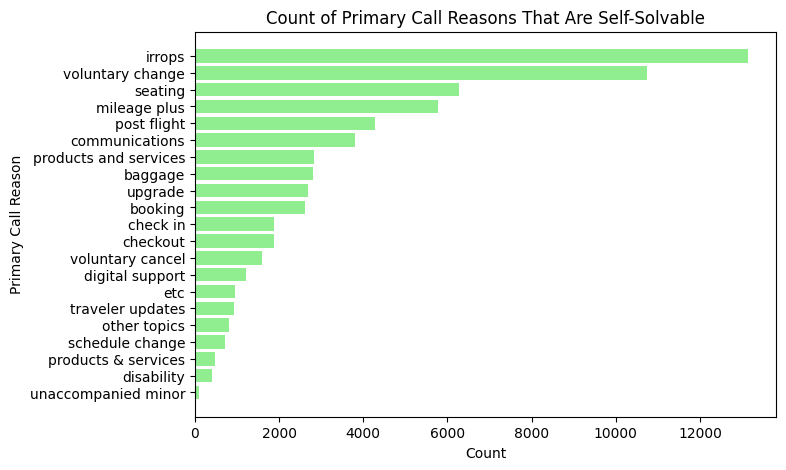

In [36]:
import pandas as pd
self_solvable_keywords = [
    'reset', 'change', 'cancel', 'update', 'track', 'check', 
    'self service', 'how to', 'guide', 'faq', 'information', 
    'login', 'account', 'balance', 'receipt', 'refund'
]

def is_self_solvable(transcript):
    return any(keyword in transcript.lower() for keyword in self_solvable_keywords)

merged_df['self_solvable'] = merged_df['call_transcript'].apply(is_self_solvable)

self_solvable_calls = merged_df[merged_df['self_solvable']]

self_solvable_reason_counts = self_solvable_calls['primary_call_reason'].value_counts().reset_index()
self_solvable_reason_counts.columns = ['Primary Call Reason', 'Count']

print("Count of Self-Solvable Call Reasons:")
print(self_solvable_reason_counts)

import matplotlib.pyplot as plt

plt.figure(figsize=(7.5, 5))
plt.barh(self_solvable_reason_counts['Primary Call Reason'], self_solvable_reason_counts['Count'], color='lightgreen')
plt.title('Count of Primary Call Reasons That Are Self-Solvable')
plt.xlabel('Count')
plt.ylabel('Primary Call Reason')
plt.gca().invert_yaxis() 
plt.show()


In [5]:
pip install textblob

  Using cached textblob-0.19.0-py3-none-any.whl.metadata (4.4 kB)
  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached click-8.2.1-py3-none-any.whl.metadata (2.5 kB)
  Using cached regex-2024.11.6-cp313-cp313-win_amd64.whl.metadata (41 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached textblob-0.19.0-py3-none-any.whl (624 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Using cached regex-2024.11.6-cp313-cp313-win_amd64.whl (273 kB)
Using cached click-8.2.1-py3-none-any.whl (102 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Flight/Service-related words and their occurrences:
Counter({'delay': 663, 'lost': 151, 'missing': 137, 'wait': 108, 'late': 103, 'gate': 54, 'tarmac': 53, 'baggage': 50, 'cancelled': 50, 'rude': 42, 'cold': 34, 'luggage': 32, 'difficult': 23, 'limited': 15, 'overbooked': 15, 'damaged': 15, 'broken': 13, 'security': 10})


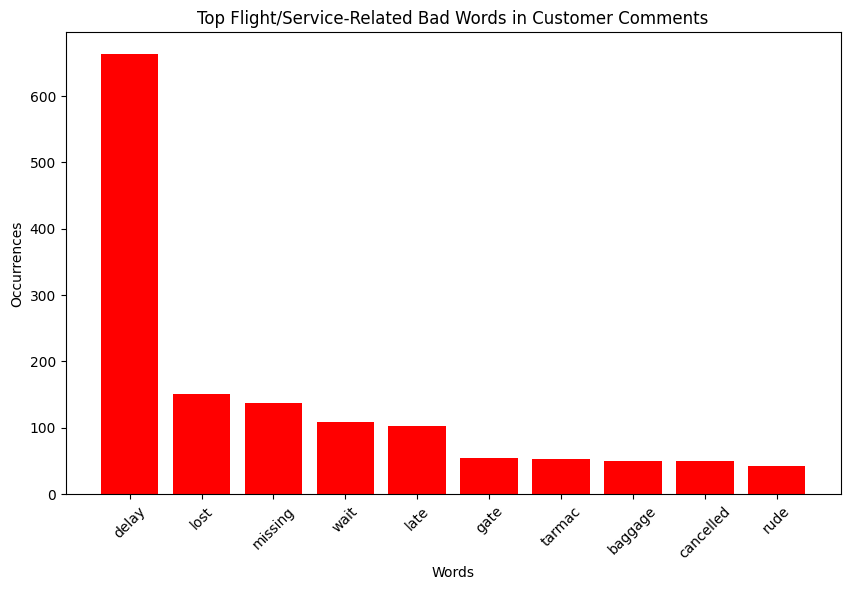

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import re
from collections import Counter
from textblob import TextBlob

# Load the CSV files
calls_df = pd.read_csv(r'dataset\calls.csv')
customers_df = pd.read_csv(r'dataset\customers.csv')
reasons_df = pd.read_csv(r'dataset\reasons.csv')


# Step 1: Extract comments or transcripts
if 'call_transcript' not in calls_df.columns:
    raise ValueError("The 'transcript' column is not found in the dataset.")
transcripts = calls_df['call_transcript'].fillna('')  # Handling NaNs

# Step 2: Perform sentiment analysis
def get_sentiment(comment):
    analysis = TextBlob(comment)
    # Categorize sentiment as positive, negative, or neutral
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to the transcripts
calls_df['sentiment'] = transcripts.apply(get_sentiment)

# Step 3: Identify bad words (negative sentiment drivers)
bad_words = []
negative_comments = calls_df[calls_df['sentiment'] == 'negative']['call_transcript']

flight_service_bad_words= [ 'difficult', 'limited', 'poor service', 'not clean', 'untidy', 'unedible', 'cold', 
                           'delay', 'cancelled', 'lost', 'late', 'broken', 
                           'overbooked', 'rude', 'damaged', 'baggage', 'luggage', 'missing', 'wait',
                           'security', 'gate', 'tarmac']  # Example bad words

# Extract all words from negative comments and count occurrences
def find_bad_flight_words(comment):
    words = re.findall(r'\w+', comment.lower())
    return [word for word in words if word in flight_service_bad_words]

negative_comments_flight_words = negative_comments.apply(find_bad_flight_words)
all_bad_flight_words = Counter([word for sublist in negative_comments_flight_words for word in sublist])

# Display top flight-related bad words with their frequencies
print("Flight/Service-related words and their occurrences:")
print(all_bad_flight_words)

# Step 4: Visualize the distribution of sentiments
sentiment_counts = calls_df['sentiment'].value_counts()


plt.figure(figsize=(10, 6))
flight_words_sorted = dict(all_bad_flight_words.most_common(10))
plt.bar(flight_words_sorted.keys(), flight_words_sorted.values(), color='red')
plt.title("Top Flight/Service-Related Bad Words in Customer Comments")
plt.xlabel("Words")
plt.ylabel("Occurrences")
plt.xticks(rotation=45)
plt.show()

Calls Columns: Index(['call_id', 'customer_id', 'agent_id', 'call_start_datetime',
       'agent_assigned_datetime', 'call_end_datetime', 'call_transcript'],
      dtype='object')
Customers Columns: Index(['customer_id', 'customer_name', 'elite_level_code'], dtype='object')
Reasons Columns: Index(['call_id', 'primary_call_reason'], dtype='object')
Sentiment Statistics Columns: Index(['call_id', 'agent_id', 'agent_tone', 'customer_tone',
       'average_sentiment', 'silence_percent_average'],
      dtype='object')
Non-numeric values in silence_percent_average: Empty DataFrame
Columns: [call_id, agent_id, agent_tone, customer_tone, average_sentiment, silence_percent_average]
Index: []
silence_percent_average    float64
agent_tone_encoded            int8
customer_tone_encoded         int8
average_sentiment          float64
dtype: object


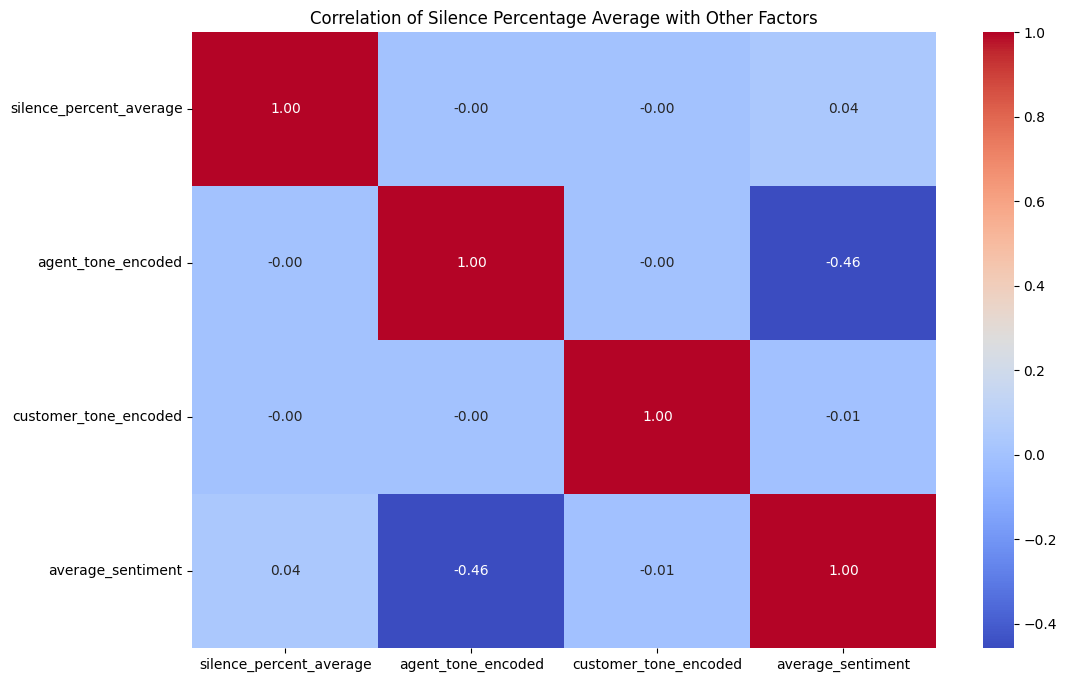

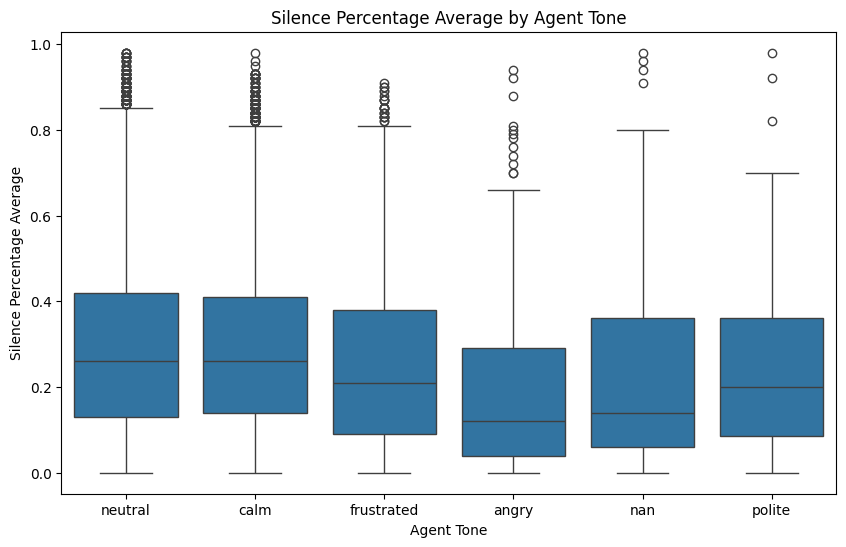

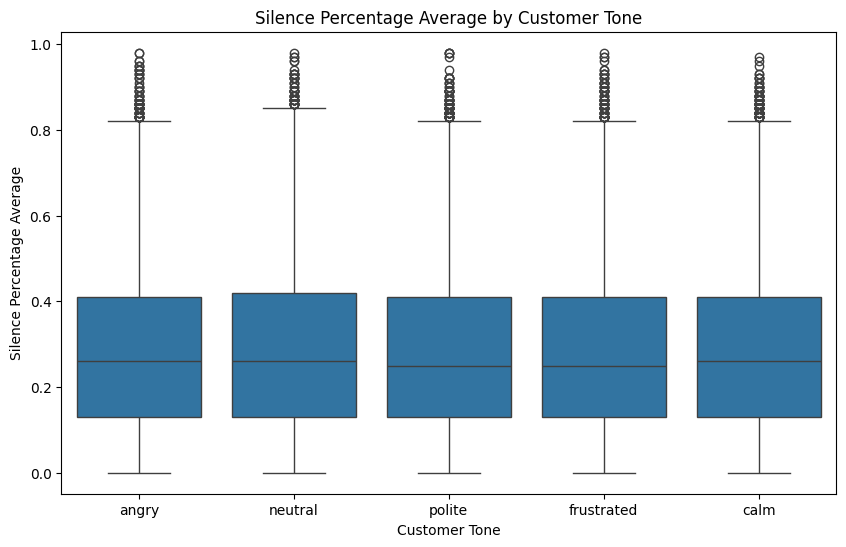

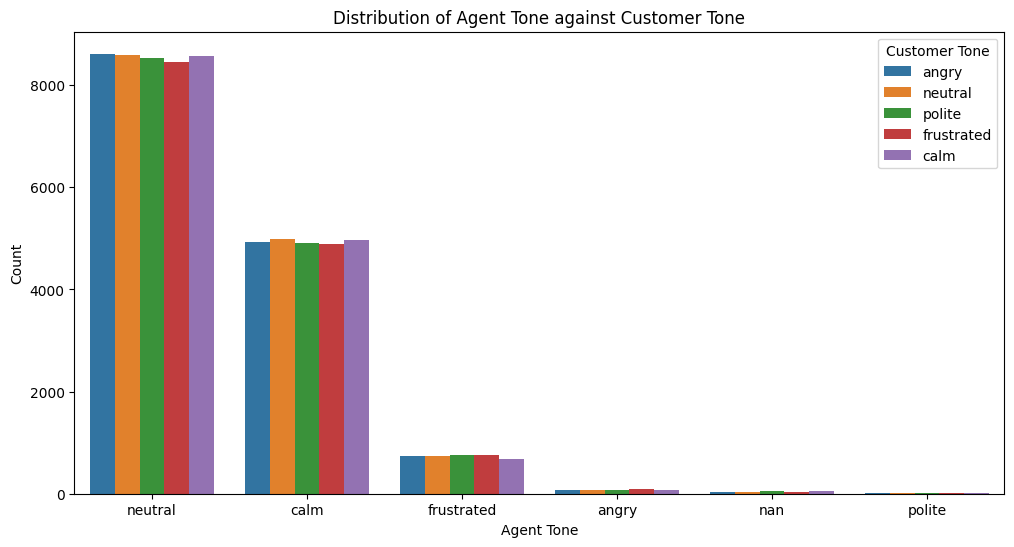

NaN values in merged_df: call_id                      0
customer_id                  0
agent_id_x                   0
call_start_datetime          0
agent_assigned_datetime      0
call_end_datetime            0
call_transcript              0
agent_id_y                   0
agent_tone                   0
customer_tone                0
average_sentiment          109
silence_percent_average      0
agent_tone_encoded           0
customer_tone_encoded        0
dtype: int64


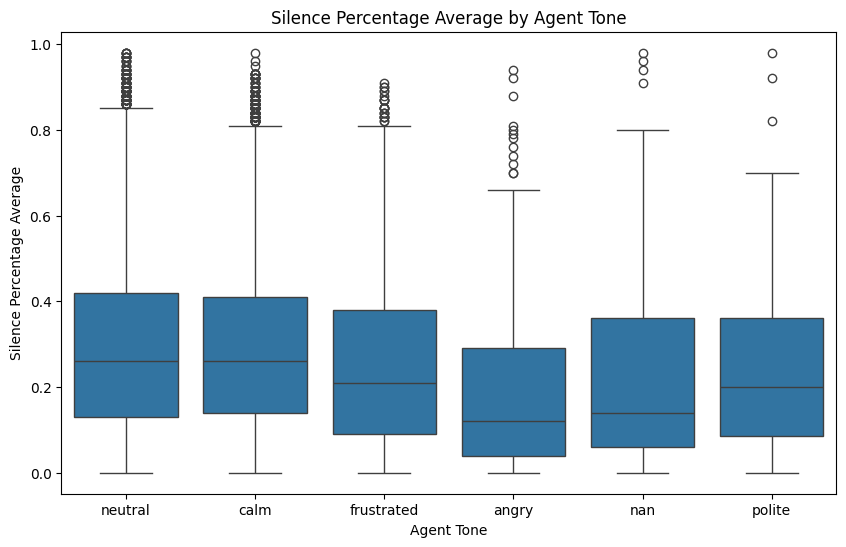

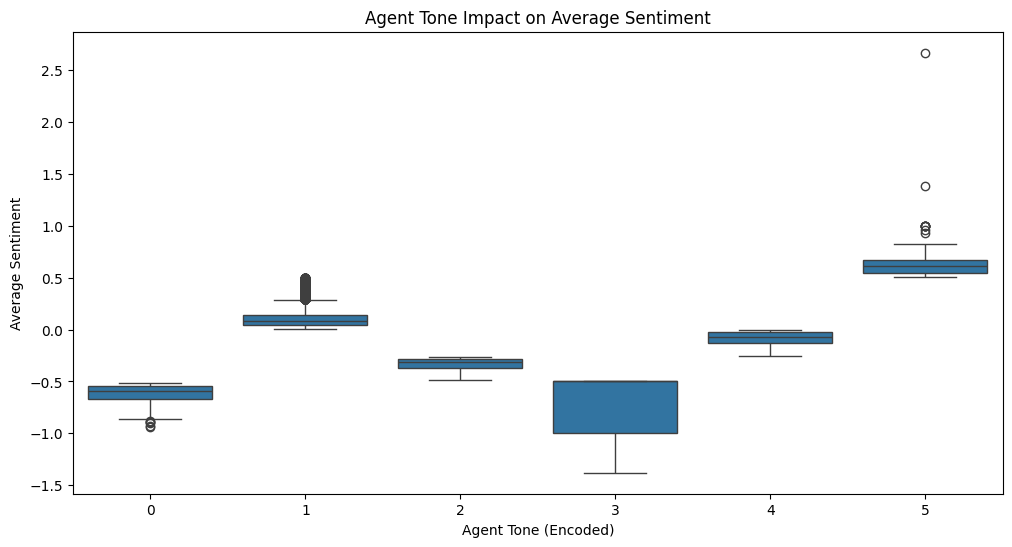

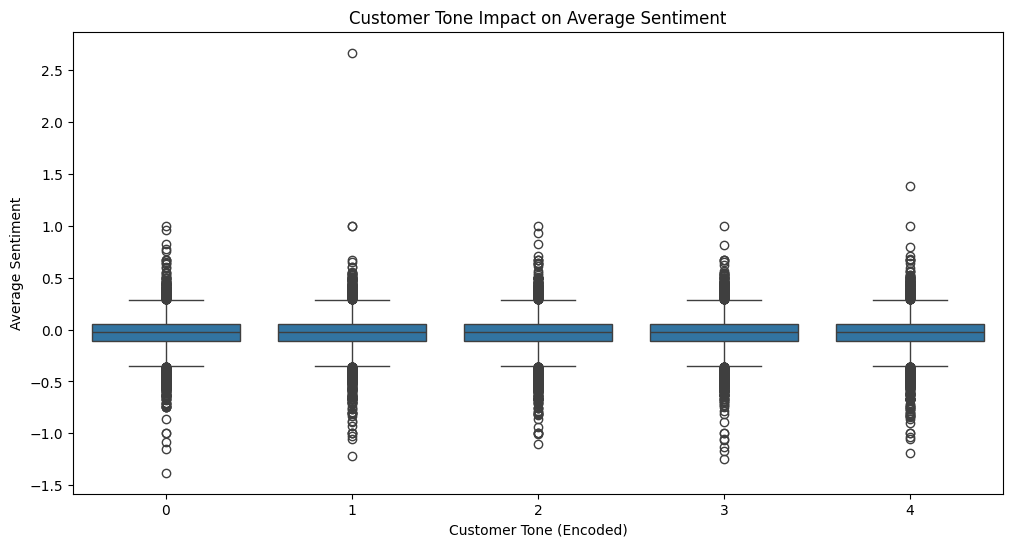

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

calls_df = pd.read_csv(r'dataset\calls.csv')
customers_df = pd.read_csv(r'dataset\customers.csv')
reasons_df = pd.read_csv(r'dataset\reasons.csv')
sentiment_statistics_df = pd.read_csv(r'dataset\sentiment_statistics.csv')

print("Calls Columns:", calls_df.columns)
print("Customers Columns:", customers_df.columns)
print("Reasons Columns:", reasons_df.columns)
print("Sentiment Statistics Columns:", sentiment_statistics_df.columns)

# Converting relevant columns in calls_df to appropriate types
calls_df['call_start_datetime'] = pd.to_datetime(calls_df['call_start_datetime'], errors='coerce')  # Adjust this as needed
sentiment_statistics_df['silence_percent_average'] = pd.to_numeric(sentiment_statistics_df['silence_percent_average'], errors='coerce')  # Ensure silence_percent_average is numeric

# Checking for non-numeric values in silence_percent_average
print("Non-numeric values in silence_percent_average:", sentiment_statistics_df[sentiment_statistics_df['silence_percent_average'].isna()])

# Ensuring agent_tone and customer_tone are strings
sentiment_statistics_df['agent_tone'] = sentiment_statistics_df['agent_tone'].astype(str)  # Convert to string if not already
sentiment_statistics_df['customer_tone'] = sentiment_statistics_df['customer_tone'].astype(str)  # Convert to string if not already

# Dropping rows with NaN in relevant columns
sentiment_statistics_df = sentiment_statistics_df.dropna(subset=['silence_percent_average', 'agent_tone', 'customer_tone'])
sentiment_statistics_df['agent_tone_encoded'] = sentiment_statistics_df['agent_tone'].astype('category').cat.codes
sentiment_statistics_df['customer_tone_encoded'] = sentiment_statistics_df['customer_tone'].astype('category').cat.codes
correlation_data = sentiment_statistics_df[['silence_percent_average', 'agent_tone_encoded', 'customer_tone_encoded', 'average_sentiment']]

print(correlation_data.dtypes)

# Check the correlations with silence_percent_average
correlation_matrix = correlation_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation of Silence Percentage Average with Other Factors')
plt.show()

# Boxplot to see silence percentage average across agent tone
plt.figure(figsize=(10, 6))
sns.boxplot(x='agent_tone', y='silence_percent_average', data=sentiment_statistics_df)
plt.title('Silence Percentage Average by Agent Tone')
plt.xlabel('Agent Tone')
plt.ylabel('Silence Percentage Average')
plt.show()

# Boxplot to see silence percentage average across customer tone
plt.figure(figsize=(10, 6))
sns.boxplot(x='customer_tone', y='silence_percent_average', data=sentiment_statistics_df)
plt.title('Silence Percentage Average by Customer Tone')
plt.xlabel('Customer Tone')
plt.ylabel('Silence Percentage Average')
plt.show()

# Analyzing agent tone against customer tone and other metrics
plt.figure(figsize=(12, 6))
sns.countplot(data=sentiment_statistics_df, x='agent_tone', hue='customer_tone')
plt.title('Distribution of Agent Tone against Customer Tone')
plt.xlabel('Agent Tone')
plt.ylabel('Count')
plt.legend(title='Customer Tone')
plt.show()

# Merging with calls_df to analyze how tone affects sentiment
merged_df = pd.merge(calls_df, sentiment_statistics_df, on='call_id', how='left')

# Check for NaN values in the merged dataframe
print("NaN values in merged_df:", merged_df.isna().sum())

# Boxplot to compare agent tone and average silence percentage
plt.figure(figsize=(10, 6))
sns.boxplot(x='agent_tone', y='silence_percent_average', data=sentiment_statistics_df)
plt.title('Silence Percentage Average by Agent Tone')
plt.xlabel('Agent Tone')
plt.ylabel('Silence Percentage Average')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='agent_tone_encoded', y='average_sentiment', data=merged_df)
plt.title('Agent Tone Impact on Average Sentiment')
plt.xlabel('Agent Tone (Encoded)')
plt.ylabel('Average Sentiment')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='customer_tone_encoded', y='average_sentiment', data=merged_df)
plt.title('Customer Tone Impact on Average Sentiment')
plt.xlabel('Customer Tone (Encoded)')
plt.ylabel('Average Sentiment')
plt.show()


C:\Users\prana\AppData\Local\Temp\ipykernel_5032\385966537.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['primary_call_reason'].replace(replacements, inplace=True)
C:\Users\prana\AppData\Local\Temp\ipykernel_5032\385966537.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=reason_analysis, x='primary_call_reason', y='average_sentiment', palette

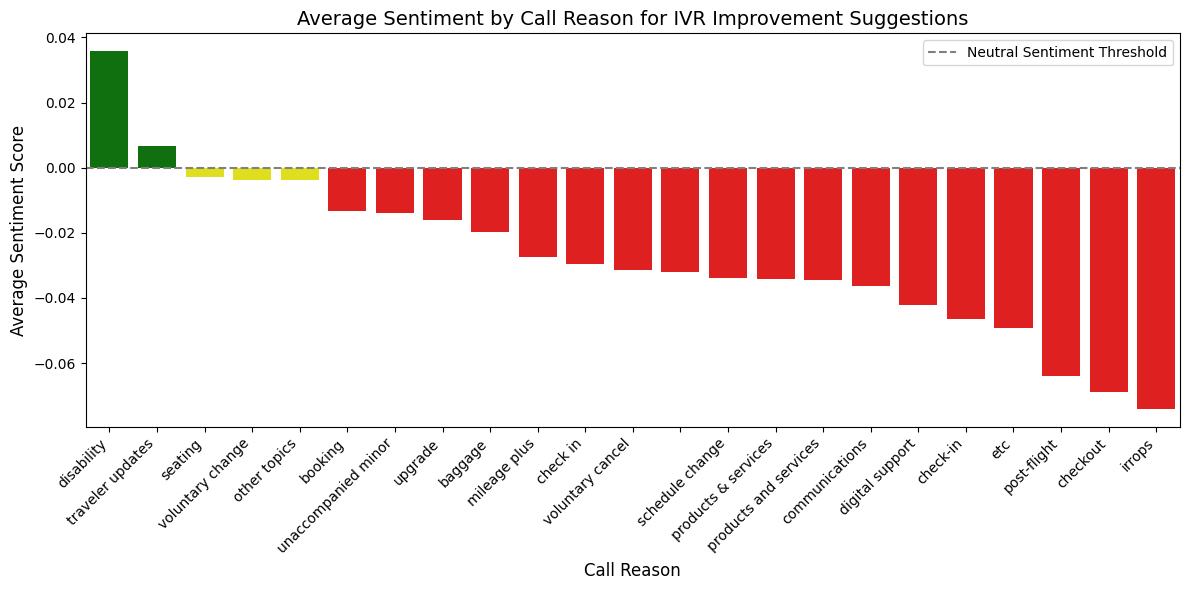

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
sentiment_statistics_df = pd.read_csv(r'dataset\sentiment_statistics.csv')
reason_df = pd.read_csv(r'dataset\reasons.csv')

# Merge the dataframes
merged_df = pd.merge(sentiment_statistics_df, reason_df, on='call_id', how='left')

# Clean the 'primary_call_reason' column
def clean_call_reason(reason):
    if pd.isna(reason):
        return ''
    # Convert to lowercase, strip whitespace, and replace multiple spaces with a single space
    return ' '.join(reason.lower().strip().split())

# Apply the cleaning function
merged_df['primary_call_reason'] = merged_df['primary_call_reason'].apply(clean_call_reason)

# Apply replacements
replacements = {
    'digital   support': 'digital support',
    'digital  support': 'digital support',
    'irrops': 'irrops',
    'post flight': 'post-flight',
}
merged_df['primary_call_reason'].replace(replacements, inplace=True)

# Calculate average sentiment and call volume
reason_analysis = merged_df.groupby('primary_call_reason').agg(
    average_sentiment=('average_sentiment', 'mean'),
    call_volume=('call_id', 'count')
).reset_index()

# Sort by average sentiment
reason_analysis.sort_values(by='average_sentiment', ascending=False, inplace=True)

# Define sentiment color function for individual values
def sentiment_color(sentiment):
    if sentiment > 0.0:  # Positive sentiment
        return 'green'
    elif sentiment >= -0.01 and sentiment <= 0.0:  # Neutral sentiment
        return 'yellow'
    else:  # Negative sentiment
        return 'red'

# Apply the color function to individual values
reason_analysis['color'] = reason_analysis['average_sentiment'].apply(sentiment_color)

# Create the bar plot
plt.figure(figsize=(12, 6))
# Pass the 'color' Series as a list to palette
bar_plot = sns.barplot(data=reason_analysis, x='primary_call_reason', y='average_sentiment', palette=reason_analysis['color'].tolist())

# Customize the plot
plt.title('Average Sentiment by Call Reason for IVR Improvement Suggestions', fontsize=14)
plt.xlabel('Call Reason', fontsize=12)
plt.ylabel('Average Sentiment Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.axhline(0, color='gray', linestyle='--', label='Neutral Sentiment Threshold')
plt.legend()
plt.tight_layout()
plt.show()

Average Handle Time (AHT): 18.90 minutes
Average Speed to Answer (AST): 7.28 minutes


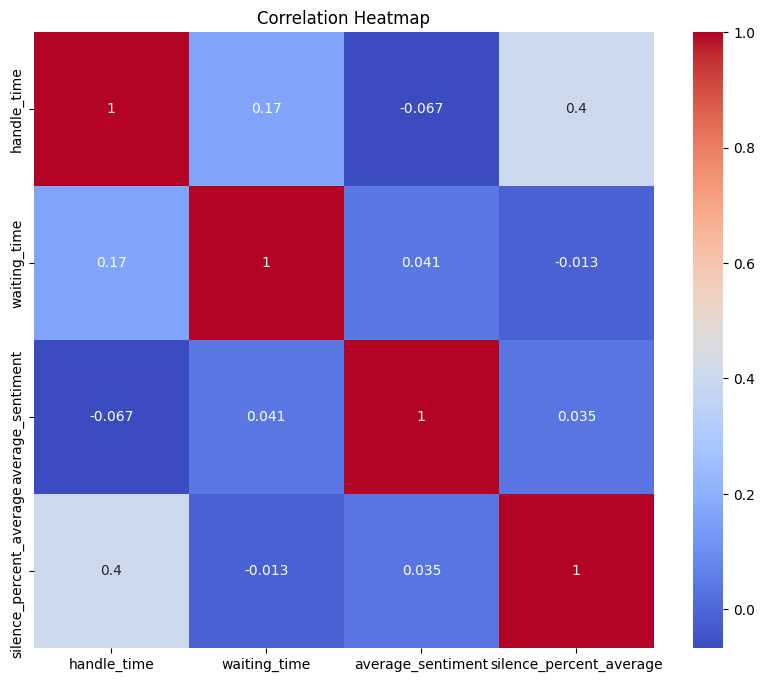

In [18]:
import pandas as pd

calls = pd.read_csv(r'dataset\calls.csv')
customers = pd.read_csv(r'dataset\customers.csv')
reasons = pd.read_csv(r'dataset\reasons.csv')
sentiment_stats = pd.read_csv(r'dataset\sentiment_statistics.csv')

merged_data = calls.merge(reasons, on='call_id').merge(sentiment_stats, on='call_id').merge(customers, on='customer_id')

merged_data['call_start_datetime'] = pd.to_datetime(merged_data['call_start_datetime'], errors='coerce')
merged_data['agent_assigned_datetime'] = pd.to_datetime(merged_data['agent_assigned_datetime'], errors='coerce')
merged_data['call_end_datetime'] = pd.to_datetime(merged_data['call_end_datetime'], errors='coerce')

merged_data = merged_data.dropna(subset=['call_start_datetime', 'agent_assigned_datetime', 'call_end_datetime'])

merged_data['handle_time'] = (merged_data['call_end_datetime'] - merged_data['call_start_datetime']).dt.total_seconds() / 60  # AHT in minutes

# Calculate AHT
total_handle_time = merged_data['handle_time'].sum()
total_calls = merged_data['call_id'].nunique()
AHT = total_handle_time / total_calls if total_calls > 0 else 0

# Calculate AST
merged_data['waiting_time'] = (merged_data['agent_assigned_datetime'] - merged_data['call_start_datetime']).dt.total_seconds() / 60  # waiting time in minutes
total_waiting_time = merged_data['waiting_time'].sum()
AST = total_waiting_time / total_calls if total_calls > 0 else 0

print(f'Average Handle Time (AHT): {AHT:.2f} minutes')
print(f'Average Speed to Answer (AST): {AST:.2f} minutes')

import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = merged_data[['handle_time', 'waiting_time', 'average_sentiment', 'silence_percent_average']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

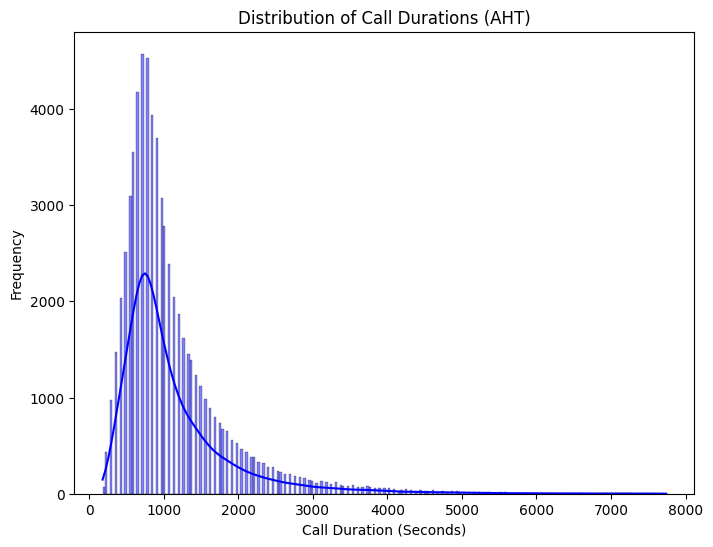

C:\Users\prana\AppData\Local\Temp\ipykernel_5032\730681189.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='elite_level_code', y='call_duration', data=aht_by_elite_level, palette='viridis')


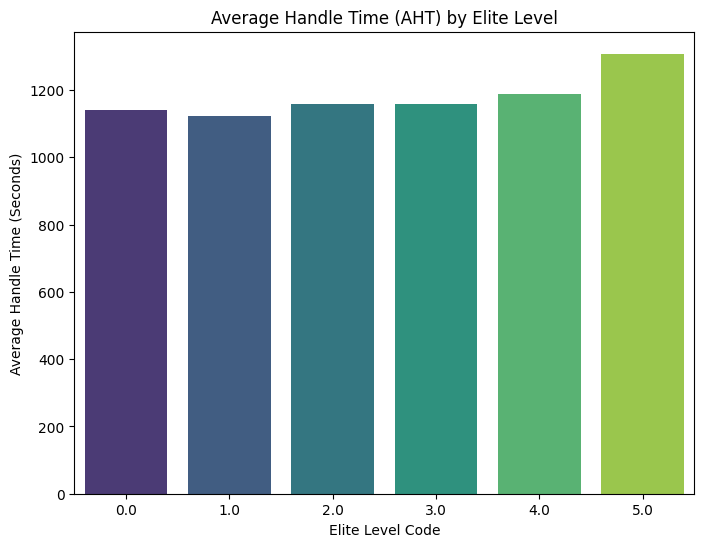

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV files
calls_df = pd.read_csv(r'dataset\calls.csv')
customers_df = pd.read_csv(r'dataset\customers.csv')
reasons_df = pd.read_csv(r'dataset\reasons.csv')
sentiment_df = pd.read_csv(r'dataset\sentiment_statistics.csv')

# Clean inconsistent values in `primary_call_reason`
def clean_reason(reason):
    reason = reason.lower().replace("-", " ").strip()
    return " ".join(reason.split())

reasons_df['primary_call_reason'] = reasons_df['primary_call_reason'].apply(clean_reason)

# Merging data for analysis
calls_df['call_start_datetime'] = pd.to_datetime(calls_df['call_start_datetime'])
calls_df['call_end_datetime'] = pd.to_datetime(calls_df['call_end_datetime'])
calls_df['call_duration'] = (calls_df['call_end_datetime'] - calls_df['call_start_datetime']).dt.total_seconds()

# Merging data
merged_df = pd.merge(calls_df, reasons_df, on='call_id')
merged_df = pd.merge(merged_df, sentiment_df, on=['call_id', 'agent_id'])
merged_df = pd.merge(merged_df, customers_df, on='customer_id')

# 1. Average Handle Time (AHT) overall
plt.figure(figsize=(8, 6))
sns.histplot(merged_df['call_duration'], kde=True, color='blue')
plt.title('Distribution of Call Durations (AHT)')
plt.xlabel('Call Duration (Seconds)')
plt.ylabel('Frequency')
plt.show()

# 2. AHT by customer elite level
aht_by_elite_level = merged_df.groupby('elite_level_code')['call_duration'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='elite_level_code', y='call_duration', data=aht_by_elite_level, palette='viridis')
plt.title('Average Handle Time (AHT) by Elite Level')
plt.xlabel('Elite Level Code')
plt.ylabel('Average Handle Time (Seconds)')
plt.show()


# Export final cleaned datasets (optional)
reasons_df.to_csv('cleaned_reasons.csv', index=False)


C:\Users\prana\AppData\Local\Temp\ipykernel_5032\159568041.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='primary_call_reason', data=reasons_freq.head(10), palette='magma')


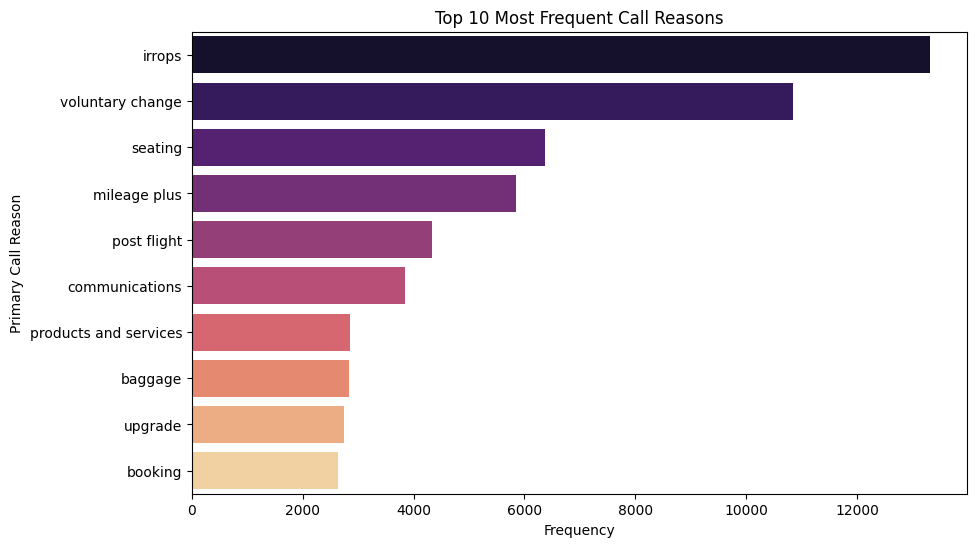

In [23]:
reasons_freq = merged_df['primary_call_reason'].value_counts().reset_index()
reasons_freq.columns = ['primary_call_reason', 'frequency']

plt.figure(figsize=(10, 6))
sns.barplot(x='frequency', y='primary_call_reason', data=reasons_freq.head(10), palette='magma')
plt.title('Top 10 Most Frequent Call Reasons')
plt.xlabel('Frequency')
plt.ylabel('Primary Call Reason')
plt.show()

C:\Users\prana\AppData\Local\Temp\ipykernel_5032\3830792357.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='call_duration', y='primary_call_reason', data=reasons_aht.sort_values(by='call_duration', ascending=False).head(15), palette='plasma')


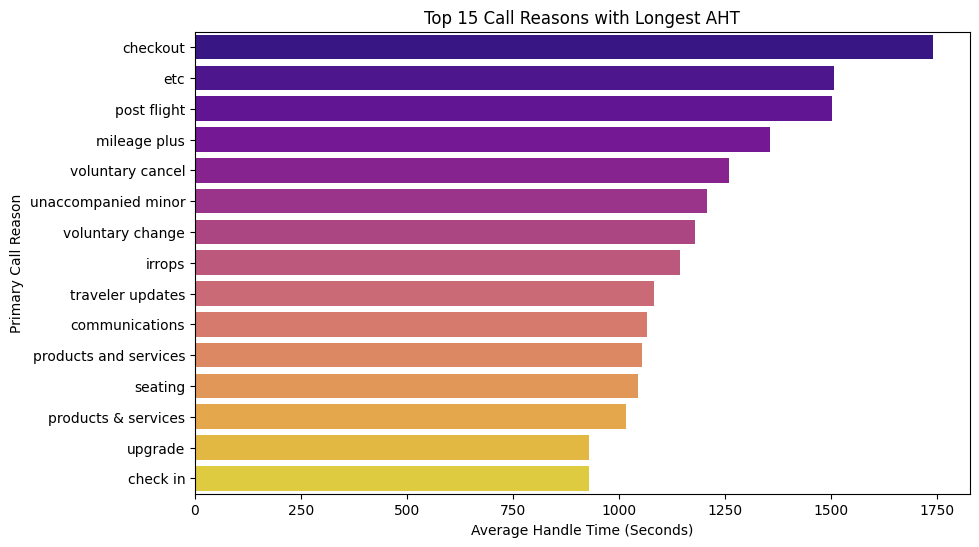

In [25]:
# 3. AHT by primary call reason
reasons_aht = merged_df.groupby('primary_call_reason')['call_duration'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='call_duration', y='primary_call_reason', data=reasons_aht.sort_values(by='call_duration', ascending=False).head(15), palette='plasma')
plt.title('Top 15 Call Reasons with Longest AHT')
plt.xlabel('Average Handle Time (Seconds)')
plt.ylabel('Primary Call Reason')
plt.show()

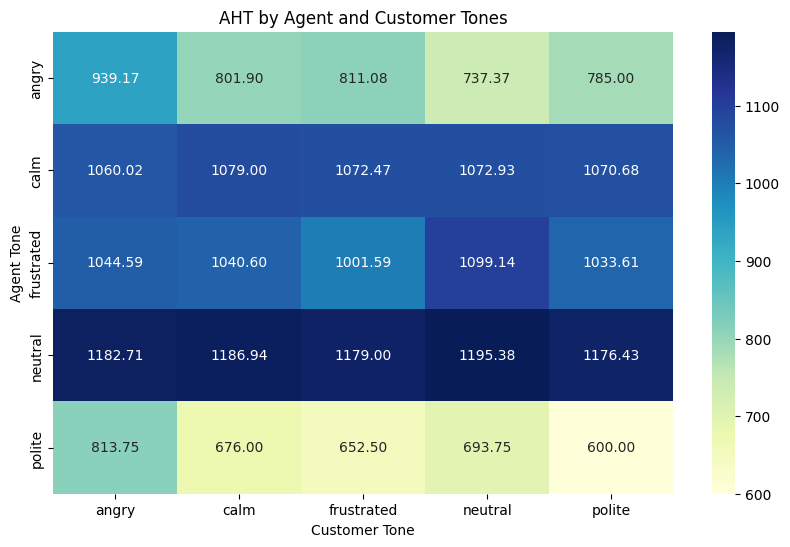

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by agent_tone and customer_tone, then calculate the average call_duration (AHT)
sentiment_aht = merged_df.groupby(['agent_tone', 'customer_tone'])['call_duration'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.heatmap(sentiment_aht.pivot(index='agent_tone', columns='customer_tone', values='call_duration'), 
            annot=True, cmap='YlGnBu', fmt=".2f")

plt.title('AHT by Agent and Customer Tones')
plt.xlabel('Customer Tone')
plt.ylabel('Agent Tone')
plt.show()


In [157]:
import pandas as pd

sentiment_statistics_df = pd.read_csv('sentiment_statistics.csv')

print(sentiment_statistics_df.head())

high_silence_calls = sentiment_statistics_df[sentiment_statistics_df['silence_percent_average'] > 30]

# View calls with high silence percentages
print("Calls with High Silence Percentages:")
print(high_silence_calls[['call_id', 'agent_id', 'silence_percent_average']])
high_silence_calls.to_csv('high_silence_calls.csv', index=False)

# Calculating average silence percentage by agent
agent_silence_stats = sentiment_statistics_df.groupby('agent_id')['silence_percent_average'].mean().reset_index()
# Identifying agents with higher than average silence percentage
average_silence = agent_silence_stats['silence_percent_average'].mean()
outlier_agents = agent_silence_stats[agent_silence_stats['silence_percent_average'] > average_silence]
# View agents identified as outliers
print("Agents with Higher Silence Percentages:")
print(outlier_agents)
outlier_agents.to_csv('outlier_agents.csv', index=False)


      call_id  agent_id agent_tone customer_tone  average_sentiment  \
0  4667960400    963118    neutral         angry              -0.04   
1  1122072124    519057       calm       neutral               0.02   
2  6834291559    158319    neutral        polite              -0.13   
3  2266439882    488324    neutral    frustrated              -0.20   
4  1211603231    721730    neutral        polite              -0.05   

   silence_percent_average  
0                     0.39  
1                     0.35  
2                     0.32  
3                     0.20  
4                     0.35  
Calls with High Silence Percentages:
Empty DataFrame
Columns: [call_id, agent_id, silence_percent_average]
Index: []
Agents with Higher Silence Percentages:
     agent_id  silence_percent_average
1      103651                 0.293389
3      107876                 0.405000
6      114609                 0.308358
7      119952                 0.305462
8      121149                 0.300968
..      

E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


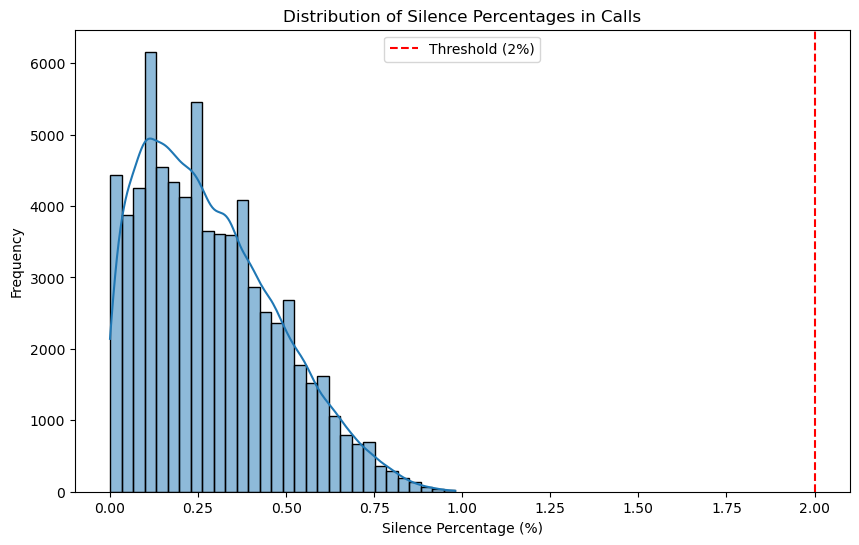

In [160]:
# Plot distribution of silence percentages
plt.figure(figsize=(10, 6))
sns.histplot(sentiment_statistics_df['silence_percent_average'], bins=30, kde=True)
plt.title('Distribution of Silence Percentages in Calls')
plt.xlabel('Silence Percentage (%)')
plt.ylabel('Frequency')
plt.axvline(x=2, color='red', linestyle='--', label='Threshold (2%)')
plt.legend()
plt.show()


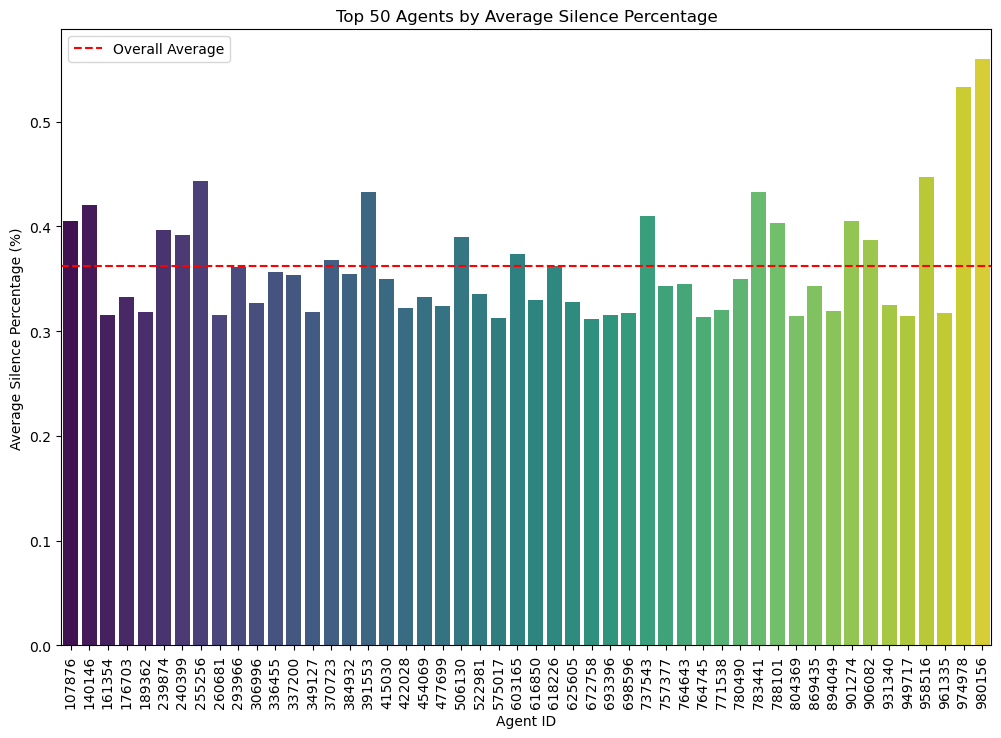

In [169]:
# Calculating average silence percentage by agent
agent_silence_stats = sentiment_statistics_df.groupby('agent_id')['silence_percent_average'].mean().reset_index()
# Sorting by average silence percentage in descending order and get the top 50 agents
top_agents = agent_silence_stats.sort_values(by='silence_percent_average', ascending=False).head(50)

plt.figure(figsize=(12, 8))
sns.barplot(x='agent_id', y='silence_percent_average', data=top_agents, palette='viridis')
plt.title('Top 50 Agents by Average Silence Percentage')
plt.xlabel('Agent ID')
plt.xticks(rotation=90)
plt.ylabel('Average Silence Percentage (%)')

overall_average = top_agents['silence_percent_average'].mean()
plt.axhline(y=overall_average, color='red', linestyle='--', label='Overall Average')
plt.legend()
plt.show()


E:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)

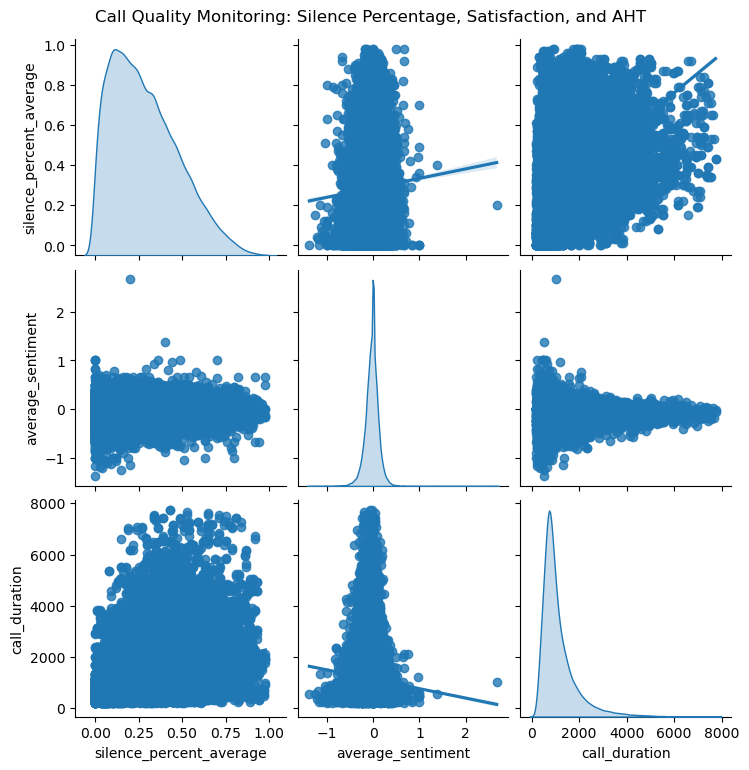

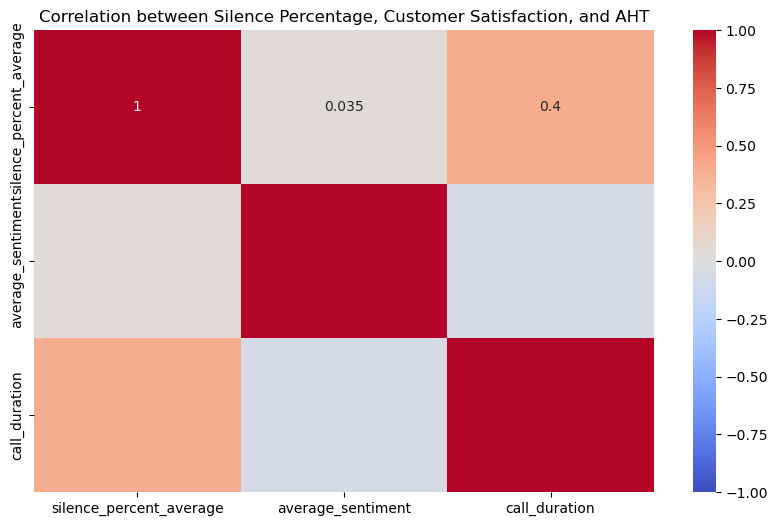

In [172]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

calls_df = pd.read_csv('calls.csv')
sentiment_statistics_df = pd.read_csv('sentiment_statistics.csv')

# Converting call_start_datetime and call_end_datetime to datetime
calls_df['call_start_datetime'] = pd.to_datetime(calls_df['call_start_datetime'])
calls_df['call_end_datetime'] = pd.to_datetime(calls_df['call_end_datetime'])

# Calculate call duration in seconds
calls_df['call_duration'] = (calls_df['call_end_datetime'] - calls_df['call_start_datetime']).dt.total_seconds()
merged_df = pd.merge(calls_df, sentiment_statistics_df, on='call_id')
call_quality_df = merged_df[['silence_percent_average', 'average_sentiment', 'call_duration']].copy()

# Plot relationships between Silence Percentage, Customer Satisfaction, and AHT using pairplot
sns.pairplot(call_quality_df, diag_kind='kde', kind='reg', palette='coolwarm')
plt.suptitle('Call Quality Monitoring: Silence Percentage, Satisfaction, and AHT', y=1.02)
plt.show()

# Correlation heatmap between Silence Percentage, Customer Satisfaction (Sentiment), and AHT
plt.figure(figsize=(10, 6))
sns.heatmap(call_quality_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Silence Percentage, Customer Satisfaction, and AHT')
plt.show()


Top 10 Agents with Highest Workload:
     agent_id  total_workload_minutes
58     251287                  8621.0
370    965878                  8597.0
199    594957                  8572.0
368    963118                  8543.0
272    757349                  8379.0
355    931734                  8368.0
180    542034                  8329.0
241    686999                  8247.0
98     347606                  8209.0
43     204674                  8119.0


E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


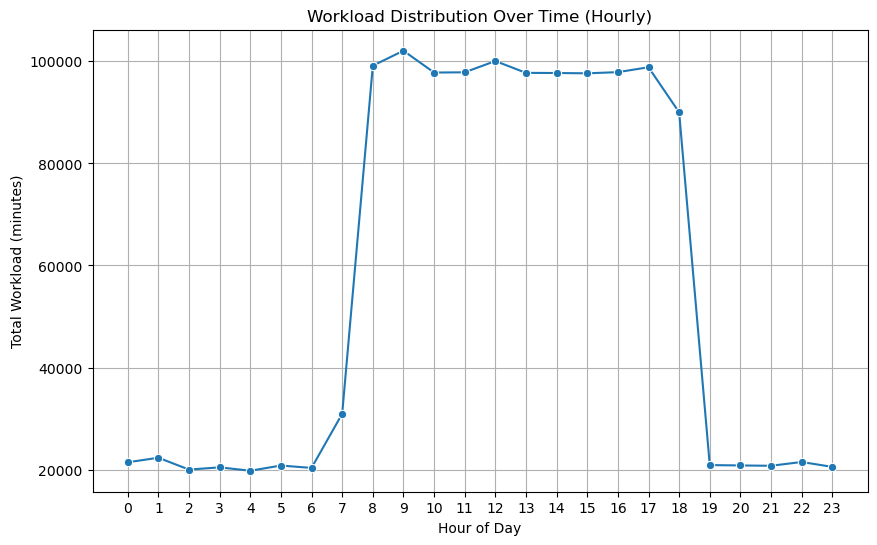

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the merged dataset containing calls and agent information
calls_df = pd.read_csv('calls.csv')

# Convert call_start_time and call_end_time to datetime format (adjust column names as per your dataset)
calls_df['call_start_datetime'] = pd.to_datetime(calls_df['call_start_datetime'])
calls_df['call_end_datetime'] = pd.to_datetime(calls_df['call_end_datetime'])

# Calculate call duration in minutes
calls_df['call_duration'] = (calls_df['call_end_datetime'] - calls_df['call_start_datetime']).dt.total_seconds() / 60

# Step 1: Calculate total workload per agent (sum of call durations)
workload_per_agent = calls_df.groupby('agent_id')['call_duration'].sum().reset_index()
workload_per_agent.columns = ['agent_id', 'total_workload_minutes']

# Step 3: Identify agents with highest workloads
top_agents = workload_per_agent.sort_values(by='total_workload_minutes', ascending=False).head(10)
print("Top 10 Agents with Highest Workload:")
print(top_agents)

# Step 4: Workload distribution over time (hourly workload analysis)
calls_df['call_hour'] = calls_df['call_start_datetime'].dt.hour
workload_by_hour = calls_df.groupby('call_hour')['call_duration'].sum().reset_index()

# Visualize hourly workload distribution
plt.figure(figsize=(10, 6))
sns.lineplot(data=workload_by_hour, x='call_hour', y='call_duration', marker='o')
plt.title('Workload Distribution Over Time (Hourly)')
plt.xlabel('Hour of Day')
plt.ylabel('Total Workload (minutes)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


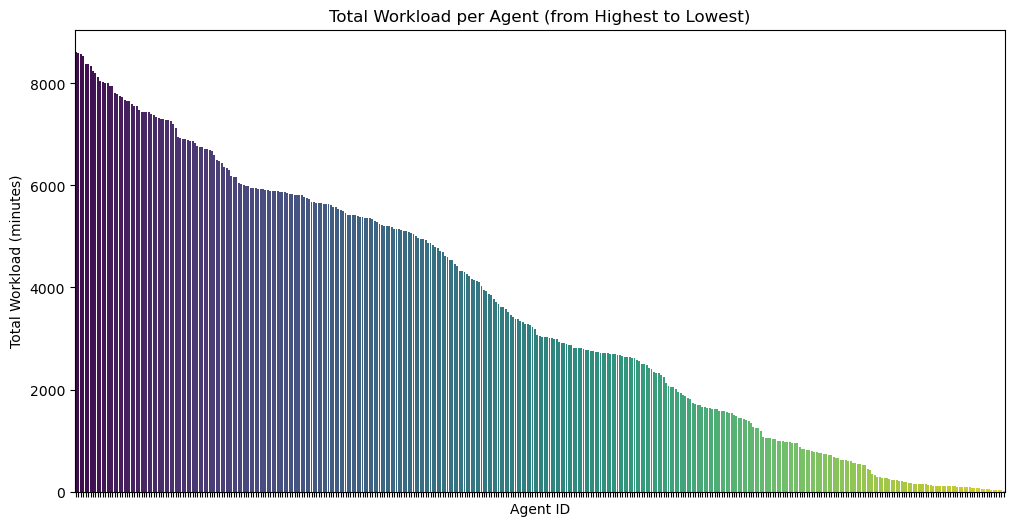

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the merged dataset containing calls and agent information
calls_df = pd.read_csv('calls.csv')

# Convert call_start_time and call_end_time to datetime format (adjust column names as per your dataset)
calls_df['call_start_datetime'] = pd.to_datetime(calls_df['call_start_datetime'])
calls_df['call_end_datetime'] = pd.to_datetime(calls_df['call_end_datetime'])

# Calculate call duration in minutes
calls_df['call_duration'] = (calls_df['call_end_datetime'] - calls_df['call_start_datetime']).dt.total_seconds() / 60

# Step 1: Calculate total workload per agent (sum of call durations)
workload_per_agent = calls_df.groupby('agent_id')['call_duration'].sum().reset_index()
workload_per_agent.columns = ['agent_id', 'total_workload_minutes']

# Step 2: Sort the workload data from highest to lowest
workload_per_agent = workload_per_agent.sort_values(by='total_workload_minutes', ascending=False)

# Step 3: Ensure the agent_id order is sorted explicitly
plt.figure(figsize=(12, 6))

sns.barplot(
    x='agent_id',
    y='total_workload_minutes',
    data=workload_per_agent,
    palette='viridis',
    order=workload_per_agent['agent_id']  # Set the order explicitly based on sorted values
)

plt.title('Total Workload per Agent (from Highest to Lowest)')
plt.xlabel('Agent ID')
plt.ylabel('Total Workload (minutes)')
plt.xticks(rotation=90)
plt.xticks(visible=False)
plt.show()



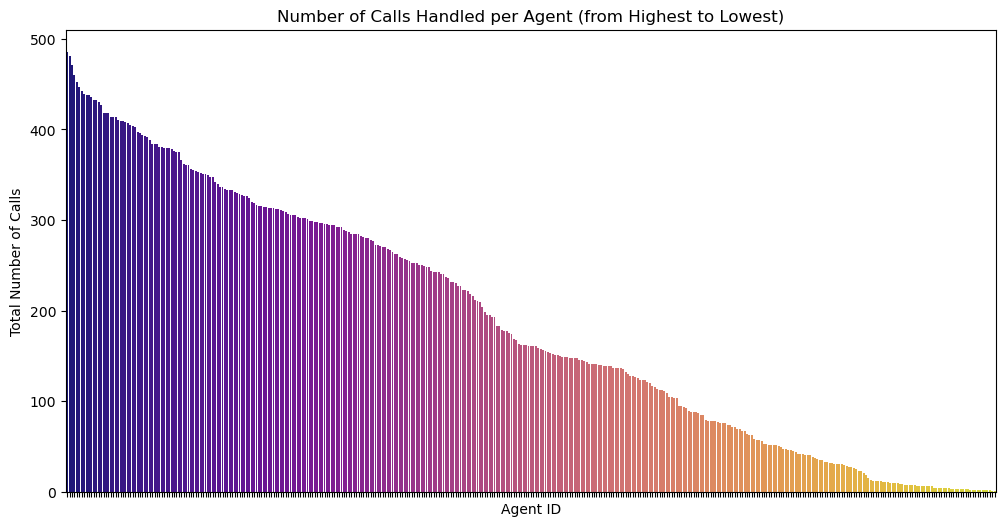

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the merged dataset containing calls and agent information
calls_df = pd.read_csv('calls.csv')

# Step 1: Calculate the number of calls handled per agent
calls_per_agent = calls_df.groupby('agent_id')['call_id'].count().reset_index()
calls_per_agent.columns = ['agent_id', 'total_calls']

# Step 2: Sort the data by the number of calls handled (from highest to lowest)
calls_per_agent = calls_per_agent.sort_values(by='total_calls', ascending=False)

# Step 3: Plot the number of calls per agent in sorted order
plt.figure(figsize=(12, 6))

sns.barplot(
    x='agent_id',
    y='total_calls',
    data=calls_per_agent,
    palette='plasma',
    order=calls_per_agent['agent_id']  # Ensure the order is based on sorted values
)

plt.title('Number of Calls Handled per Agent (from Highest to Lowest)')
plt.xlabel('Agent ID')
plt.ylabel('Total Number of Calls')
plt.xticks(rotation=90)
plt.xticks(visible=False)
plt.show()
